# Image Classification/Prediction Model using TensorFlow Keras📷

## Description

Image classification is a fundamental task in computer vision that involves assigning a category label to an image. The goal of this project is to create an image classification model using TensorFlow Keras, a popular deep learning framework, to categorize images into predefined classes. This readme provides an overview of the concept and methods used in this project.

### Concept

The concept of image classification revolves around training a neural network model to learn the distinguishing features of different categories or classes of images. This model can then predict the class of a new, unseen image based on the features it has learned during training. The core idea is to map images to a set of numerical values, often referred to as features or embeddings, and then use these embeddings to make predictions.

### Methods

#### 1. Dataset Preparation

The first step in building an image classification model is to gather and prepare the dataset. The dataset should be organized into categories, and each category should contain a set of labeled images. Proper dataset preparation ensures that the model can learn to distinguish between different classes.

#### 2. Model Architecture

The model architecture defines the structure of the neural network. In this project, TensorFlow and Keras are used to create a Convolutional Neural Network (CNN) model, a popular choice for image classification. CNNs are well-suited for capturing spatial hierarchies of features in images.

#### 3. Training

During the training phase, the model is exposed to the labeled images in the dataset. It learns to extract features and patterns that are indicative of each class. The model is trained to minimize a loss function, which measures the dissimilarity between its predictions and the true labels. The optimization process adjusts the model's parameters to improve its accuracy.

#### 4. Evaluation

After training, the model's performance is evaluated using a separate test dataset. The accuracy, precision, recall, and F1-score are some common metrics used to assess the model's classification performance. This step helps ensure that the model generalizes well to new, unseen data.

#### 5. Inference

Once the model is trained and evaluated, it can be used to classify new images. The inference process involves loading the trained model and using it to predict the class of a given image. This enables real-world applications, such as automatic image tagging, content filtering, and more.

By following these steps, you can create a robust image classification model using TensorFlow Keras. The model can be adapted to various domains and applications, including but not limited to object recognition, handwriting digit recognition, and image content analysis.

## 01 Installing the dependencies and Setting up of the System

In [1]:
# Installing Libraries
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install kaggle
! pip install tensorflow
! pip install opencv-python

In [2]:
from google.colab import files
files.upload()  # This will open a file uploader in your notebook.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"test200414","key":"0f37bbcc50c83128347ff1ab2af928ac"}'}

In [3]:
# Create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# Copy the file to the folder
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json
# Make sure the API token has the correct permissions. You can do this with the following commands

In [6]:
# Downloading the data the dataset
! kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 95% 61.0M/64.4M [00:00<00:00, 171MB/s]
100% 64.4M/64.4M [00:00<00:00, 145MB/s]


In [7]:
! unzip cats-and-dogs-image-classification.zip

Archive:  cats-and-dogs-image-classification.zip
  inflating: test/cats/cat_1.jpg     
  inflating: test/cats/cat_106.jpg   
  inflating: test/cats/cat_109.jpg   
  inflating: test/cats/cat_113.jpg   
  inflating: test/cats/cat_114.jpg   
  inflating: test/cats/cat_116.jpg   
  inflating: test/cats/cat_118.jpg   
  inflating: test/cats/cat_119.jpg   
  inflating: test/cats/cat_124.jpg   
  inflating: test/cats/cat_140.jpg   
  inflating: test/cats/cat_147.jpg   
  inflating: test/cats/cat_156.jpg   
  inflating: test/cats/cat_158.jpg   
  inflating: test/cats/cat_162.jpg   
  inflating: test/cats/cat_18.jpg    
  inflating: test/cats/cat_190.jpg   
  inflating: test/cats/cat_203.jpg   
  inflating: test/cats/cat_223.jpg   
  inflating: test/cats/cat_234.jpg   
  inflating: test/cats/cat_244.jpg   
  inflating: test/cats/cat_251.jpg   
  inflating: test/cats/cat_255.jpg   
  inflating: test/cats/cat_268.jpg   
  inflating: test/cats/cat_279.jpg   
  inflating: test/cats/cat_281.jpg   
 

In [8]:
# importing the required libraries
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model

## 02 Cleaning the dataset

Preparing a dataset for image classification involves gathering, organizing, and labeling a collection of images in a way that allows you to train and evaluate your image classification model effectively. Here are the general steps to prepare a dataset:

1. **Gather Images**:
   - Collect a diverse and representative set of images for each category or class you want to classify. The number of images per class should be balanced to avoid class imbalance issues.

2. **Labeling**:
   - Assign a unique label or identifier to each category or class you want to classify. These labels will be used to associate images with their corresponding classes during training and evaluation.

3. **Organize the Directory Structure**:
   - Organize the images into a structured directory hierarchy where each subdirectory corresponds to a class or category. The directory structure should look like this:

   ```
   dataset/
       class1/
           image1.jpg
           image2.jpg
           ...
       class2/
           image1.jpg
           image2.jpg
           ...
       ...
   ```

   For example, if you are classifying animals, you might have subdirectories named "cat," "dog," "horse," etc., each containing images of that specific animal.

4. **Data Splitting**:
   - Divide your dataset into training, validation, and test sets. A common split is 70% for training, 15% for validation, and 15% for testing. The training set is used to train the model, the validation set helps tune hyperparameters, and the test set is used to evaluate the model's performance.

5. **Data Augmentation (Optional)**:
   - Data augmentation techniques, such as rotation, flipping, and resizing, can be applied to increase the diversity of your training data. This can help improve the model's ability to generalize to unseen images.

6. **Image Preprocessing**:
   - Preprocess your images to ensure they have consistent dimensions and pixel values. Common preprocessing steps include resizing images to a uniform size, normalizing pixel values, and converting images to the same color space.

7. **Generate Labels**:
   - Create a mapping between class labels and numerical values. This mapping is necessary for the model to understand which class corresponds to each label.

Once you have prepared your dataset, you can use it to train, validate, and test your image classification model. Be sure to maintain consistency in naming, labeling, and organization to ensure smooth and accurate training. Additionally, you can use data loading tools provided by deep learning frameworks like TensorFlow or PyTorch to load and preprocess your dataset during training and evaluation.

In [9]:
data_dir = 'train' # Path to the training data

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
# Removing images if they don't fit the required suffix
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## 03 Loading the DataSet via tensorflow data pipeline

**Data pipelines** are a key component of data processing and machine learning workflows. They are a series of data processing and transformation steps that help automate the movement, transformation, and management of data from various sources to the desired destination, such as a machine learning model. Data pipelines are essential for ensuring that data is in the right format, quality, and location for analysis, training, or other tasks. Here are some key aspects of data pipelines:

1. **Data Ingestion**: Data pipelines often begin with data ingestion, where data is collected from various sources, such as databases, files, APIs, sensors, or streaming sources. Ingestion involves acquiring data and making it available for further processing.

2. **Data Transformation**: Once data is ingested, it may need to be transformed to be suitable for the intended use. Transformation can include data cleaning, normalization, scaling, feature engineering, and other operations that prepare the data for analysis or modeling.

3. **Data Integration**: In many cases, data pipelines need to integrate data from multiple sources. Integration involves merging, joining, or consolidating data from different origins to create a unified dataset.

4. **Data Enrichment**: Data can be enriched by adding supplementary information or features that enhance its value. For example, geospatial data, sentiment analysis scores, or historical records can be added to enrich the dataset.

5. **Data Quality Assurance**: Data pipelines often include quality checks and validation steps to ensure data integrity and accuracy. This may involve identifying and handling missing values, outliers, and errors.

6. **Data Splitting**: In machine learning, data is usually divided into training, validation, and test sets. Data pipelines can automate this process, ensuring that the data is split appropriately while maintaining data consistency.

7. **Data Loading**: Once the data is processed and ready, it needs to be loaded into the target system or storage, such as a database, a data warehouse, or a machine learning framework.

8. **Data Monitoring and Logging**: Data pipelines often include monitoring and logging capabilities to track the flow of data, detect anomalies, and capture metadata about the data and processing steps for auditing and debugging.

9. **Automation**: Data pipelines are typically automated to ensure that data is processed consistently and on a regular schedule. Automation reduces the need for manual intervention and lowers the risk of human error.

10. **Scalability**: Data pipelines should be designed to handle large volumes of data efficiently. They should be scalable to accommodate growing data needs without significant performance degradation.

11. **Versioning**: It's essential to keep track of data versions, especially in machine learning. Data pipelines can be designed to manage different versions of datasets to ensure reproducibility and model consistency.

12. **Dependency Management**: Many data processing steps have dependencies, where one step relies on the output of a previous step. Data pipelines manage these dependencies to execute steps in the correct order.

13. **Error Handling and Retry**: Data pipelines should handle errors gracefully, allowing for retries and notifications when issues occur during data processing.

Data pipelines are a critical part of modern data-driven applications, including machine learning and data analysis. They help streamline the data workflow, ensure data consistency, and facilitate collaboration among data engineers, data scientists, and other stakeholders. Various tools and frameworks, such as Apache Airflow, Apache NiFi, and cloud-based solutions, are available for building and managing data pipelines.

Training Dataset

In [12]:
train = tf.keras.utils.image_dataset_from_directory('train')

Found 557 files belonging to 2 classes.


In [13]:
data_iterator = train.as_numpy_iterator()

In [14]:
# Batching the data for smooth processing
batch = data_iterator.next()

In [15]:
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

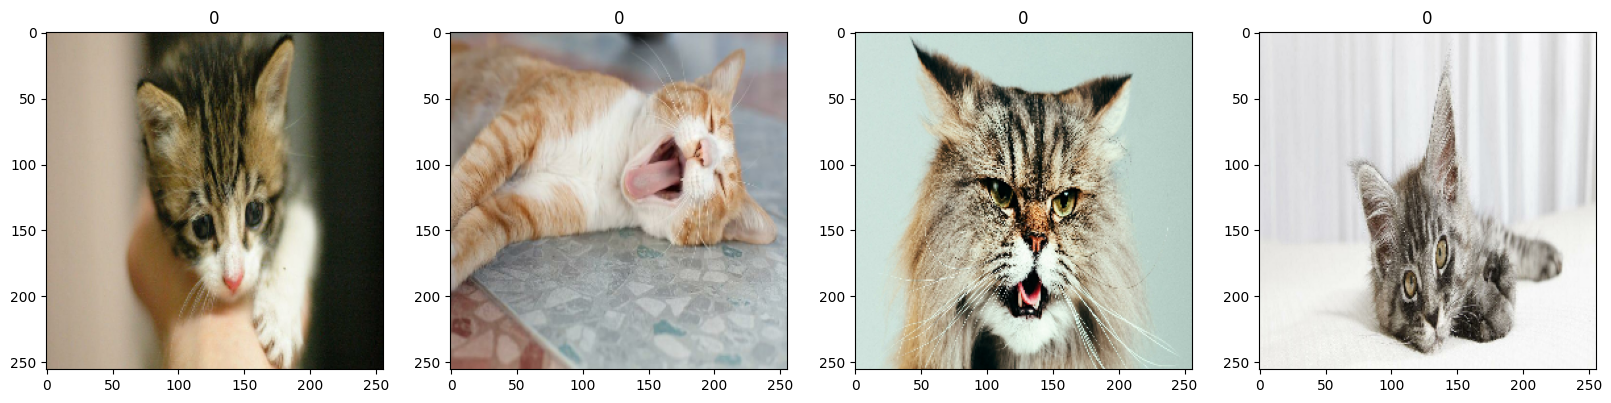

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Testing Dataset

In [17]:
test = tf.keras.utils.image_dataset_from_directory('test')

Found 140 files belonging to 2 classes.


In [18]:
data_iterator = test.as_numpy_iterator()

In [19]:
# Batching the data for smooth processing
batch = data_iterator.next()

In [20]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

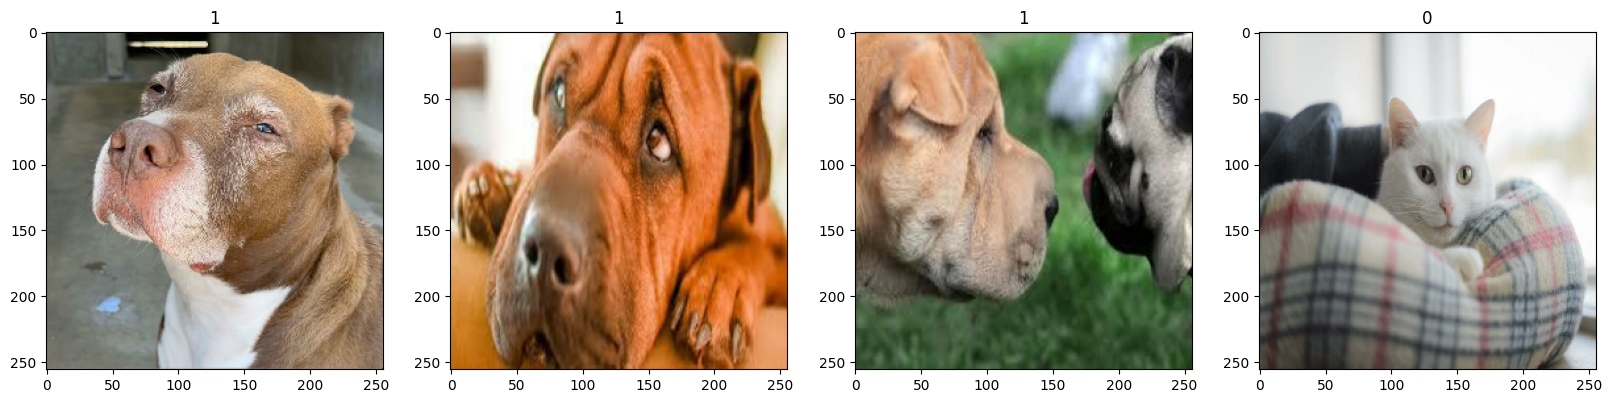

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 04 Scaling the data

### **Why is Scaling the Data Important**

Scaling or normalizing the data is often necessary in the image classification process for several reasons:

1. **Numerical Stability**: Neural networks, including convolutional neural networks (CNNs) commonly used for image classification, perform better when dealing with small, well-scaled input values. Large input values can lead to numerical instability during training, potentially causing gradient explosions and slowing down convergence.

2. **Faster Convergence**: Scaling the data to a common range (e.g., [0, 1] or [-1, 1]) helps the optimization algorithm converge faster. Normalized data allows the model to learn more quickly, reducing the number of training iterations required for the model to reach a good level of accuracy.

3. **Uniform Sensitivity**: Scaled data ensures that each feature (pixel) contributes equally to the learning process. Without scaling, certain features with larger values might dominate the learning process, making the model biased towards those features and ignoring others. Scaling helps maintain uniform sensitivity to all features.

4. **Gradient Descent**: Gradient descent, the optimization algorithm used to update model weights during training, depends on the scale of the input data. If the features have different scales, the learning rates for each feature will need to be adjusted to compensate, which can complicate the training process. Scaling mitigates this issue.

5. **Regularization**: Some regularization techniques, like L1 and L2 regularization, introduce penalty terms on the weights. Scaling helps to ensure that the regularization terms have similar effects on all features, preventing any one feature from being disproportionately penalized.

6. **Model Robustness**: Scaled data can lead to a more robust model that generalizes better to unseen data. Normalization can help the model better handle variations in lighting, contrast, and other factors that can affect the pixel values in real-world images.

7. **Consistency**: Scaling ensures consistency in data preprocessing. When you deploy your model to make predictions on new, unseen data, it's essential that the same preprocessing steps are applied to the input data, including scaling. Consistency in data preprocessing simplifies deployment and maintenance.

Typically, data is scaled by dividing the pixel values by 255 (for images with 8-bit color channels) to bring the values within the [0, 1] range, or by subtracting the mean and dividing by the standard deviation to center the data around 0 with a standard deviation of 1. This process is known as z-score normalization.

In summary, scaling or normalizing the data is a critical preprocessing step in image classification to ensure the model's stability, convergence, and generalization capabilities. It's a best practice that helps improve the overall performance of the model.

In [22]:
train = train.map(lambda x,y: (x/255, y))
train.as_numpy_iterator().next()

(array([[[[0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          ...,
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395]],
 
         [[0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          ...,
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395]],
 
         [[0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          ...,
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395],
          [0.72156864, 0.72156864, 0.50980395]],
 
         ...,
 
         [[0.46379024, 0.29733804, 0.27380863],
          [0.46208

In [23]:
test = test.map(lambda x,y: (x/255, y))
test.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

## 05 Spliting the training dataset

In [24]:
train_size = int(len(train)*.8)
val_size = int(len(train)*.2)

In [25]:
train_size

14

In [26]:
val = train.skip(train_size).take(val_size)
train = train.take(train_size)

## 06 Build Deep Learning Model


### **Convolutional Neural Network**

The code you provided represents the architecture of a Convolutional Neural Network (CNN) implemented using the Keras framework, typically used for image classification tasks. Let's break down the code step by step:

```python
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
```

This is the first layer of the neural network. It's a convolutional layer with the following characteristics:
- `Conv2D(16, (3,3))`: This layer consists of 16 filters (also known as kernels) with a size of 3x3. Each filter learns to detect different features in the input image.
- `1`: This parameter specifies the stride for the convolution operation. A stride of 1 means the filters move one pixel at a time when scanning the input.
- `activation='relu'`: The Rectified Linear Unit (ReLU) activation function is applied to the output of this layer, introducing non-linearity.

The `input_shape=(256,256,3)` indicates that the input images are expected to have dimensions of 256x256 pixels with three color channels (RGB).

```python
model.add(MaxPooling2D())
```

Following the convolutional layer, a max-pooling layer is added. Max-pooling reduces the spatial dimensions of the feature maps and retains the most important information. By default, it uses a 2x2 pooling window with a stride of 2, which reduces the feature map size by half.

This combination of convolutional and max-pooling layers is often used in the early layers of a CNN to extract low-level features from the input images.

```python
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
```

These lines add another pair of convolutional and max-pooling layers, similar to the first pair but with 32 filters in the convolutional layer. This allows the network to learn more complex and higher-level features from the feature maps produced by the previous layer.

```python
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
```

This is another pair of convolutional and max-pooling layers, with 16 filters. The repeated pattern of convolutional and max-pooling layers is a common practice in CNN architectures, gradually increasing the level of abstraction in the learned features.

```python
model.add(Flatten())
```

After the last max-pooling layer, the feature maps are flattened into a one-dimensional vector. This flattening step is necessary to connect the convolutional layers to the fully connected (dense) layers that follow.

```python
model.add(Dense(256, activation='relu'))
```

This is the first fully connected layer with 256 neurons. It's a dense layer, and the ReLU activation function is applied.

```python
model.add(Dense(1, activation='sigmoid'))
```

Finally, this is the output layer of the neural network. It consists of a single neuron with a sigmoid activation function. For binary classification tasks, like whether an image belongs to a specific class or not, a sigmoid activation function is often used. It produces an output value between 0 and 1, which can be interpreted as the probability of the input image belonging to the positive class.

In summary, the provided neural network architecture is designed for image classification tasks. It starts with a series of convolutional and max-pooling layers to extract features from the input image and gradually increases the complexity of learned features. The fully connected layers at the end of the network process these features for the final binary classification decision.

In [27]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
model = Sequential()

A Sequential neural network is a simple feedforward neural network model provided by TensorFlow and Keras for building and training deep learning models. It consists of a linear stack of layers, where each layer is fully connected to the one before and after it. In a Sequential model, you can define the architecture by stacking layers one after another. Each layer applies a linear transformation to the input data followed by a non-linear activation function.

To understand a Sequential neural network using mathematical formulas and calculations, let's consider a simple example with one input layer, one hidden layer, and one output layer.

### Example Sequential Neural Network Architecture

1. **Input Layer**:
   - Number of input features (neurons): `n_in`
   - Input vector: `X` (of shape [batch_size, n_in])
   
2. **Hidden Layer**:
   - Number of neurons in the hidden layer: `n_hidden`
   - Weight matrix: `W_hidden` (of shape [n_in, n_hidden])
   - Bias vector: `b_hidden` (of shape [n_hidden])
   - Activation function (e.g., ReLU): `σ(x) = max(0, x)`
   - Output of the hidden layer: `H = σ(X · W_hidden + b_hidden)` (of shape [batch_size, n_hidden])

3. **Output Layer**:
   - Number of output neurons: `n_out`
   - Weight matrix: `W_out` (of shape [n_hidden, n_out])
   - Bias vector: `b_out` (of shape [n_out])
   - Activation function (e.g., softmax for multiclass classification): `softmax(x_i) = exp(x_i) / sum(exp(x_j) for j in range(n_out))`
   - Raw scores before activation: `Z = H · W_out + b_out` (of shape [batch_size, n_out])
   - Predicted class probabilities: `P = softmax(Z)` (of shape [batch_size, n_out])

### Forward Pass

The forward pass of the neural network calculates the predicted class probabilities based on the input data. It involves the following steps:

1. Calculate the output of the hidden layer using the ReLU activation function:

   `H = σ(X · W_hidden + b_hidden)`

2. Calculate the raw scores for the output layer (before applying the softmax activation):

   `Z = H · W_out + b_out`

3. Apply the softmax activation to the raw scores to obtain predicted class probabilities:

   `P = softmax(Z)`

### Backpropagation

During training, the model learns by adjusting the weights and biases to minimize a loss function, typically a cross-entropy loss. Backpropagation computes the gradients of the loss with respect to the model parameters, which are then used in gradient descent optimization to update the weights and biases.

The formulas for computing gradients during backpropagation are beyond the scope of this explanation, but they involve the chain rule and derivatives of the activation functions used in the network.

In practice, the specific values for `W_hidden`, `b_hidden`, `W_out`, and `b_out` are learned through training by iteratively updating them to minimize the loss. This involves computing gradients, adjusting the parameters, and repeating the process for multiple epochs until the model converges to a good set of parameters.

This example provides a mathematical representation of a simple Sequential neural network. In practice, Sequential models can be more complex, with multiple hidden layers, different activation functions, and various output layer configurations depending on the specific task, such as binary classification, multiclass classification, or regression.

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## 07 Training the Model

In [32]:
logdir='logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 32s 2s/step - loss: 0.7725 - accuracy: 0.5000 - val_loss: 0.6848 - val_accuracy: 0.6667
Epoch 2/20
14/14 [==============================] - 29s 2s/step - loss: 0.6827 - accuracy: 0.5804 - val_loss: 0.6429 - val_accuracy: 0.7083
Epoch 3/20
14/14 [==============================] - 29s 2s/step - loss: 0.6401 - accuracy: 0.6540 - val_loss: 0.6661 - val_accuracy: 0.5729
Epoch 4/20
14/14 [==============================] - 31s 2s/step - loss: 0.5940 - accuracy: 0.6942 - val_loss: 0.4904 - val_accuracy: 0.8229
Epoch 5/20
14/14 [==============================] - 30s 2s/step - loss: 0.5113 - accuracy: 0.7723 - val_loss: 0.3958 - val_accuracy: 0.8542
Epoch 6/20
14/14 [==============================] - 29s 2s/step - loss: 0.4122 - accuracy: 0.8058 - val_loss: 0.3365 - val_accuracy: 0.8646
Epoch 7/20
14/14 [==============================] - 29s 2s/step - loss: 0.4059 - accuracy: 0.8147 - val_loss: 0.3065 - val_accuracy: 0.8958
Epoch 8/20
14/14 [==

## 08 Plot Performace

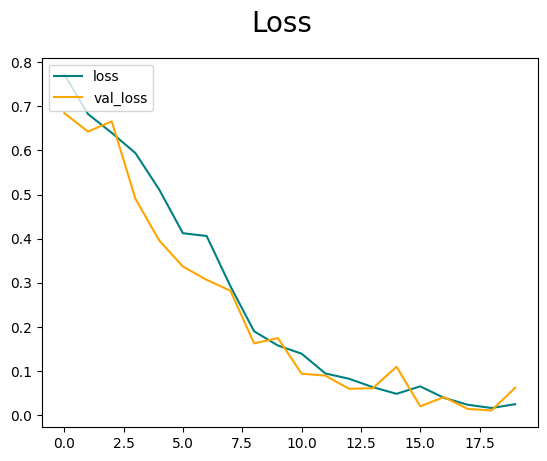

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

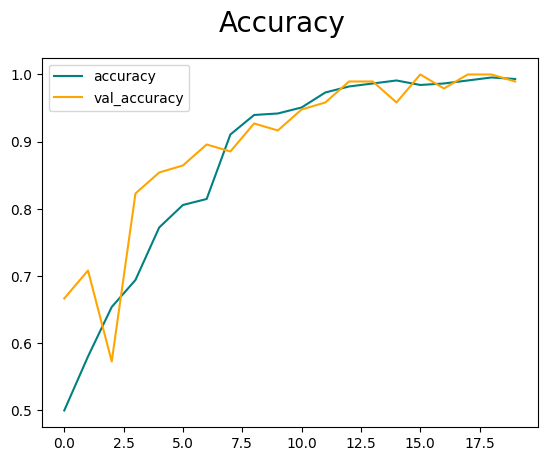

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 09 Evaluation

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 439ms/step
tf.Tensor(0.5851064, shape=(), dtype=float32) tf.Tensor(0.78571427, shape=(), dtype=float32) tf.Tensor(0.6142857, shape=(), dtype=float32)


## 10 Testing the model

Test 01

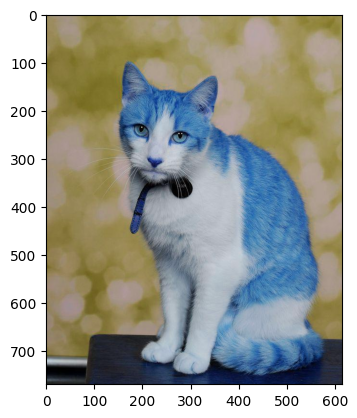

In [38]:
img = cv2.imread('/content/test/cats/cat_1.jpg')
plt.imshow(img)
plt.show()

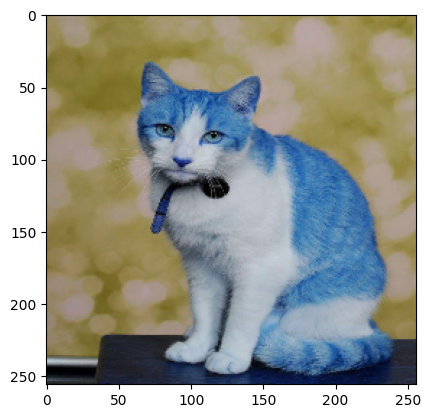

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 33ms/step


array([[0.9737437]], dtype=float32)

Test 02

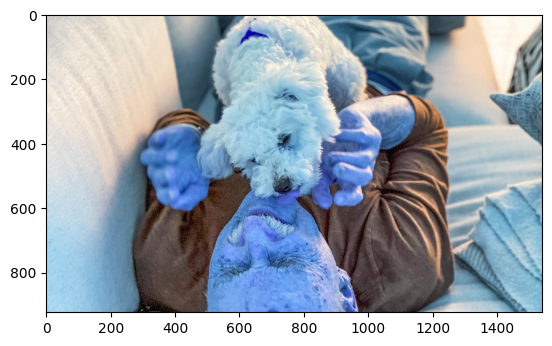

In [41]:
img = cv2.imread('/content/test/dogs/dog_227.jpg')
plt.imshow(img)
plt.show()

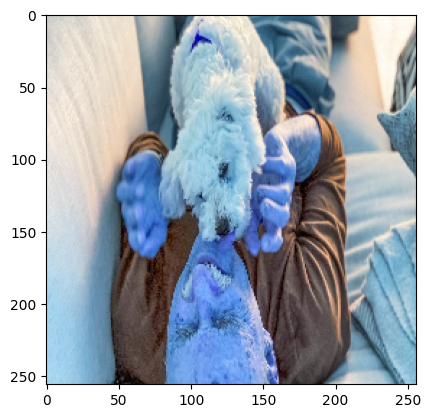

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 33ms/step


array([[0.5125363]], dtype=float32)

```py
# Function to do mass testing
def testimg(pathlist):
  img = cv2.imread(pathlist)
  plt.imshow(img)
  plt.show()
  resize = tf.image.resize(img, (256,256))
  plt.imshow(resize.numpy().astype(int))
  plt.show()
  yhat = model.predict(np.expand_dims(resize/255, 0))
  if yhat > 0.5:
    print(f'Predicted class is Dog')
  else:
    print(f'Predicted class is Cat')
```

## 11 Save the model

In [44]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
new_model = load_model('/content/models/imageclassifier.h5')

In [46]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 125ms/step


array([[0.5125363]], dtype=float32)

## 12 Conclusion

In this project, we successfully designed and implemented a Convolutional Neural Network (CNN) for image classification using TensorFlow and Keras. The CNN architecture we employed is well-suited for recognizing and categorizing images based on their visual features. The following key points summarize the project's achievements and outcomes:

**1. Dataset Preparation**: We gathered and organized a dataset, ensuring that it was structured in a way that allows for efficient training and evaluation. Proper dataset organization is essential for training a robust image classification model.

**2. Model Architecture**: We designed a CNN architecture with multiple convolutional and max-pooling layers, gradually increasing the complexity of learned features. The network can capture both low-level and high-level visual information from input images.

**3. Training and Evaluation**: We trained the model using the prepared dataset, splitting it into training, validation, and test sets. The training process involved optimizing the model's weights to minimize a loss function. After training, we evaluated the model's performance on the test dataset to assess its ability to classify images accurately.

**4. Data Preprocessing**: We incorporated data preprocessing steps, including scaling the pixel values, to ensure numerical stability during training and to allow the model to converge more efficiently.

**5. Classification and Inference**: The final model is capable of classifying images into predefined categories. We demonstrated how to make predictions on new, unseen images using the trained model.

**6. Generalization**: The model's ability to generalize to unseen data is a crucial aspect of its performance. Proper training, validation, and testing procedures were followed to assess the model's generalization capabilities.

**7. Future Improvements**: While this project is a strong foundation for image classification, there are opportunities for improvement, such as experimenting with different CNN architectures, optimizing hyperparameters, and exploring techniques like data augmentation to further enhance the model's accuracy and robustness.

In conclusion, this project showcases a successful implementation of an image classification model, demonstrating the power of deep learning in recognizing and categorizing visual content. The lessons learned and the model developed can be applied to various domains and serve as a basis for further research and development in the field of computer vision and machine learning.